In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Water_pond_tanks_2021.csv', encoding='latin-1')

In [3]:
df.head()

,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
0,4368.0,"KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)",LAKE,ANDHRA PRADESH,24.0,27.0,3.2,6.5,7,8.0,245,5160,1.6,3.2,1.02,3.6,9,21,120,210
1,2353.0,"KONDAKARLA-AAVA LAKE, PARAWADA PHARMA CITY, VI...",LAKE,ANDHRA PRADESH,26.0,29.0,3,6.8,6.9,7.8,599,1179,1.9,4.6,0.77,3.56,15,23,150,240
2,1790.0,"PULICATE LAKE , NELLORE DIST",LAKE,ANDHRA PRADESH,18.0,24.0,4.2,6,7.2,8.2,28000,56900,2.4,2.8,1.2,1.64,3,3,47,150
3,4391.0,"CHENGAMBAKAM TANK IN SRI CITY SEZ,\nTIRUPATHI",TANK,ANDHRA PRADESH,22.0,29.0,5.4,6.2,6.3,7.9,180,476,1,2.5,0.34,2.3,24,365,170,549
4,4921.0,ANNAMAYYA PROJECT ON CHEYYERU\nRESERVOIR,Wetland,ANDHRA PRADESH,21.0,30.0,5.4,6.5,7.3,8.0,496,734,1,2.3,0.35,1,43,289,240,727


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STN
Code                           619 non-null    float64
 1   Name of Monitoring Location        620 non-null    object 
 2   Type Water Body                    620 non-null    object 
 3   State Name                         620 non-null    object 
 4   Temperature
?C (Min)               617 non-null    float64
 5   Temperature
?C (Max)               617 non-null    float64
 6   Dissolved Oxygen (mg/L) (Min)      620 non-null    object 
 7   Dissolved Oxygen (mg/L) (Max)      620 non-null    object 
 8   pH (Min)                           620 non-null    object 
 9   pH (Max)                           620 non-null    float64
 10  Conductivity (?mhos/cm) (Min)      618 non-null    object 
 11  Conductivity (?mhos/cm) (Max)      618 non-null    object 

In [5]:
df.shape

(620, 20)

In [6]:
df.describe()

,STN\nCode,Temperature\n?C (Min),Temperature\n?C (Max),pH (Max)
count,619.000000,617.000000,617.000000,620.000000
mean,3442.067851,21.805186,28.374716,8.029194
std,1065.368325,4.657455,3.647189,0.492039
min,1263.000000,4.000000,16.000000,6.700000
25%,2530.500000,20.000000,25.000000,7.600000
50%,3619.000000,22.000000,28.000000,8.000000
75%,4352.500000,25.000000,30.300000,8.400000
max,5063.000000,34.000000,42.000000,10.300000


In [7]:
df.isnull().sum()

STN\nCode                            1
Name of Monitoring Location          0
Type Water Body                      0
State Name                           0
Temperature\n?C (Min)                3
Temperature\n?C (Max)                3
Dissolved Oxygen (mg/L) (Min)        0
Dissolved Oxygen (mg/L) (Max)        0
pH (Min)                             0
pH (Max)                             0
Conductivity (?mhos/cm) (Min)        2
Conductivity (?mhos/cm) (Max)        2
BOD (mg/L) (Min)                     0
BOD (mg/L) (Max)                     0
Nitrate N + Nitrite N(mg/L) (Min)    0
Nitrate N + Nitrite N(mg/L) (Max)    0
Fecal Coliform (MPN/100ml) (Min)     1
Fecal Coliform (MPN/100ml) (Max)     1
Total Coliform (MPN/100ml) (Min)     1
Total Coliform (MPN/100ml) (Max)     1
dtype: int64

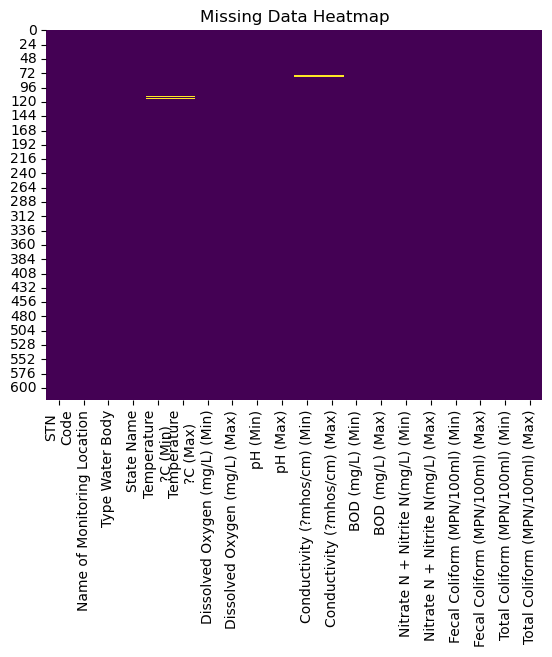

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [9]:
# Step 1: Fill numeric columns with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Step 2: Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# Step 3: Verify missing values are gone
print("Remaining Nulls:",df.isnull().sum().sum())

Remaining Nulls: 0


In [10]:
# Clean up column names
df.columns = df.columns.str.replace('\n', ' ').str.strip()

In [11]:
# Set seaborn theme
sns.set(style="whitegrid")

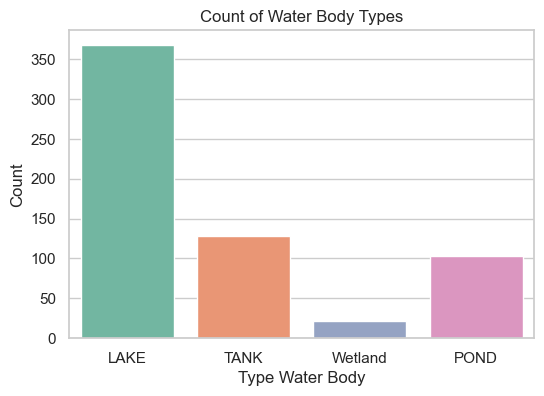

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Type Water Body', palette='Set2')
plt.title('Count of Water Body Types')
plt.xlabel('Type Water Body')
plt.ylabel('Count')
plt.show()

###  Interpretation: Count of Water Body Types

- **Lakes** have the highest number of samples (>350), indicating they are the most monitored.
- **TANKs and PONDs** have a moderate presence, with around 130 and 100 entries respectively.
- **Wetlands** are significantly underrepresented in the dataset.
- This shows an **imbalance** in data distribution across water body types.
- Focus of water quality monitoring appears to be **primarily on lakes**.


In [13]:
df['pH (Min)'] = pd.to_numeric(df['pH (Min)'], errors='coerce')  # convert invalid values to NaN

In [14]:
df['pH (Min)'] = pd.to_numeric(df['pH (Min)'], errors='coerce')  # convert invalid values to NaN

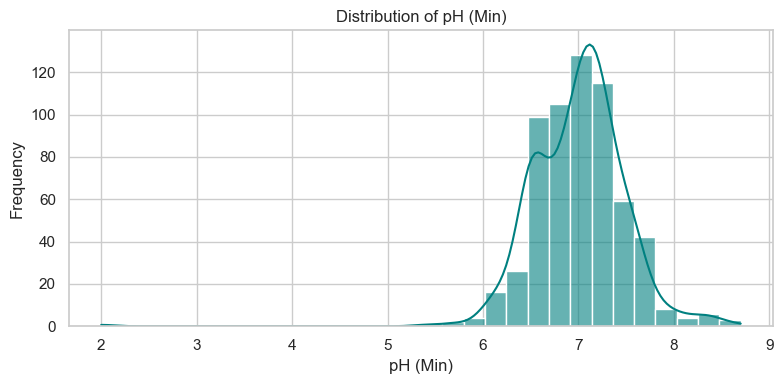

In [15]:
plt.figure(figsize=(8, 4))
sns.histplot(df['pH (Min)'], bins=30, kde=True, color='teal', alpha=0.6)
plt.title('Distribution of pH (Min)')
plt.xlabel('pH (Min)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Interpretation: Distribution of pH (Min)

- Most pH (Min) values lie between **6.5 and 7.5**, indicating **neutral to slightly alkaline** water.
- The **distribution is right-skewed**, with a few samples above pH 8.
- A small number of outliers exist **below pH 6**, possibly indicating **acidic water** in rare cases.
- The **peak frequency** is near **pH 7**, which aligns with WHO’s recommended safe range (6.5 – 8.5).


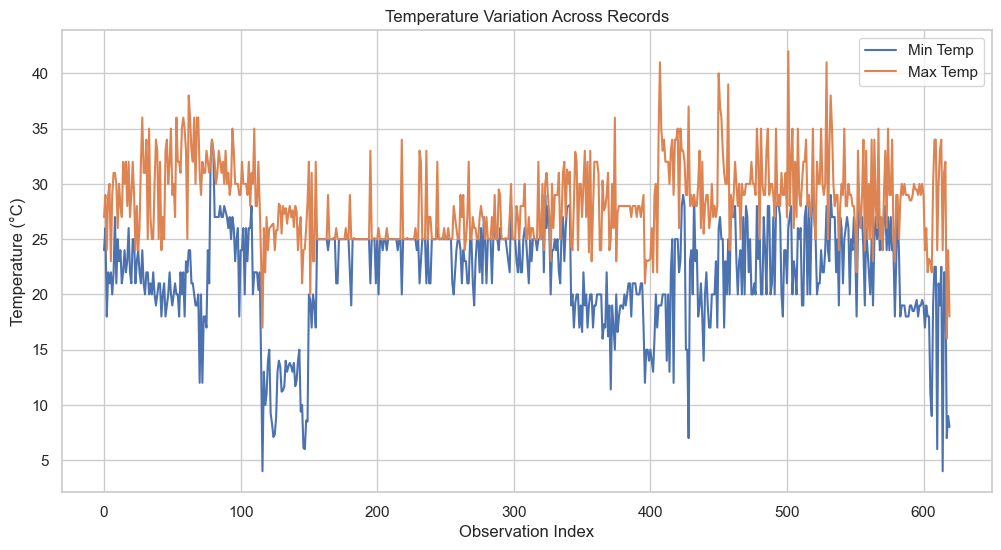

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(x=range(len(df)), y='Temperature ?C (Min)', data=df, label='Min Temp')
sns.lineplot(x=range(len(df)), y='Temperature ?C (Max)', data=df, label='Max Temp')
plt.title('Temperature Variation Across Records')
plt.xlabel('Observation Index')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

### Interpretation: Temperature Variation Across Records

- **Max temperatures** mostly range between **25°C and 40°C**, while **min temperatures** are between **10°C and 30°C**.
- A consistent **gap between max and min temperatures** is visible, indicating natural diurnal variation.
- A few records show **sharp drops** in min temperature, potentially due to measurement or environmental anomalies.
- Temperature values stay within **acceptable natural water conditions**, aligning with general water quality expectations.


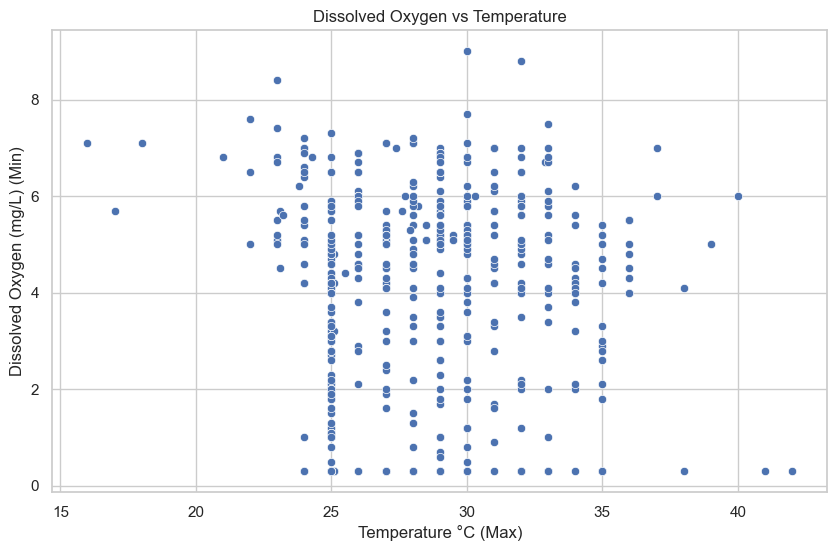

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Temperature ?C (Max)',
    y='Dissolved Oxygen (mg/L) (Min)',
    data=df
)
plt.title('Dissolved Oxygen vs Temperature')
plt.xlabel('Temperature °C (Max)')
plt.ylabel('Dissolved Oxygen (mg/L) (Min)')
plt.grid(True)
plt.show()

### Interpretation: Dissolved Oxygen vs Temperature

- There is a **negative correlation** between temperature and dissolved oxygen — higher temperatures tend to correspond with lower dissolved oxygen levels.
- Most of the dissolved oxygen values range between **2 to 6 mg/L**.
- The temperature ranges mostly from **24°C to 35°C**, with few outliers beyond 40°C.
- The spread of points indicates that **dissolved oxygen varies widely** even at similar temperatures, suggesting other influencing factors.
- Very **low dissolved oxygen** values (close to 0 mg/L) are mostly found at **higher temperatures** (above 35°C).


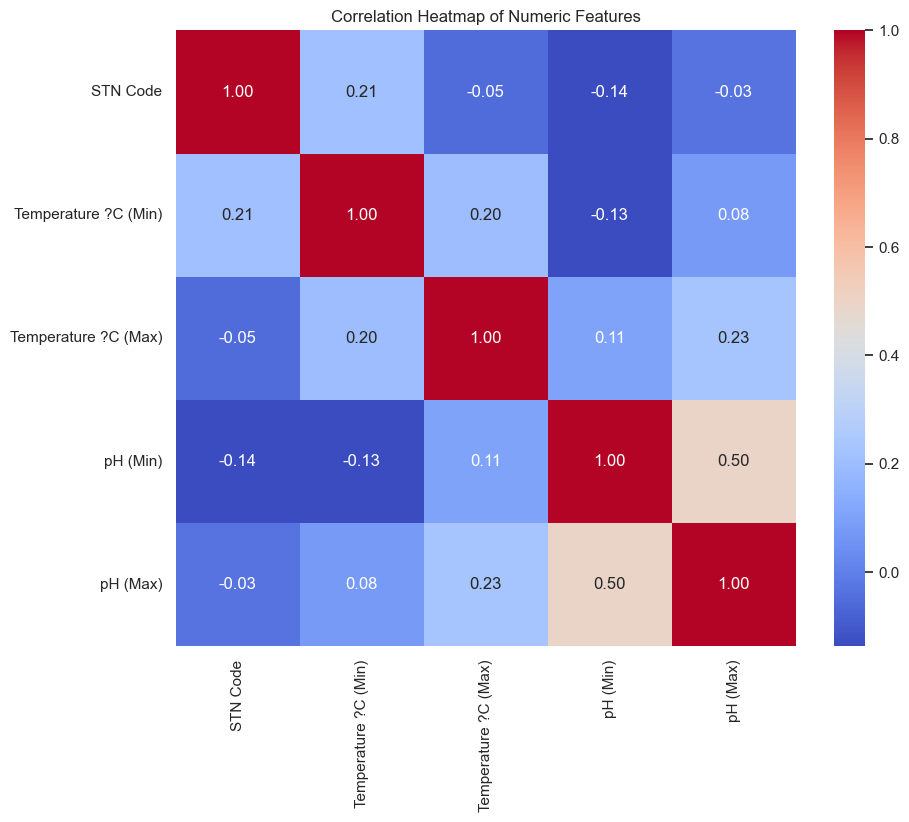

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

### Interpretation: Correlation Heatmap of Numeric Features

- **pH (Min) and pH (Max)** show a **strong positive correlation (0.50)**, suggesting pH values are relatively stable throughout the day.
- **Temperature Min and Temperature Max** are also positively correlated (0.20), though less strongly, indicating some consistency in temperature readings.
- **Temperature Max and pH Max** have a mild positive correlation (0.23), implying that higher temperatures may coincide with higher pH levels.
- **STN Code** has very low or weak correlations with all other variables, meaning it likely acts as a categorical station identifier rather than a continuous influence.
- Overall, most variables show **low correlation** with each other, hinting that they may behave independently or be influenced by external factors not captured in this dataset.

> Note: Correlation values range from -1 (perfect negative) to +1 (perfect positive), with values near 0 indicating little to no linear relationship.


In [20]:
import pandas as pd

# Assuming df is your DataFrame
# List of object columns that should be numeric
object_columns_to_convert = [
    'Dissolved Oxygen (mg/L) (Min)', 'Dissolved Oxygen (mg/L) (Max)',
    'Conductivity (?mhos/cm) (Min)', 'Conductivity (?mhos/cm) (Max)',
    'BOD (mg/L) (Min)', 'BOD (mg/L) (Max)',
    'Nitrate N + Nitrite N(mg/L) (Min)', 'Nitrate N + Nitrite N(mg/L) (Max)',
    'Fecal Coliform (MPN/100ml) (Min)', 'Fecal Coliform (MPN/100ml) (Max)',
    'Total Coliform (MPN/100ml) (Min)', 'Total Coliform (MPN/100ml) (Max)'
]

# Convert to numeric, coercing errors
for col in object_columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [21]:
df = df.drop(columns=[
    'STN Code', 'Name of Monitoring Location', 'Type Water Body', 'State Name'
])

In [22]:
# Drop rows with any nulls
df = df.dropna()

In [23]:
def is_potable(row):
    if (
        not (6.5 <= row['pH (Min)'] <= 8.5) or
        row['BOD (mg/L) (Max)'] > 6 or  # Allowing up to 6 mg/L
        row['Total Coliform (MPN/100ml) (Max)'] > 500 or
        row['Fecal Coliform (MPN/100ml) (Max)'] > 10 or
        row['Dissolved Oxygen (mg/L) (Min)'] < 4  # Less strict
    ):
        return 0
    else:
        return 1


In [30]:
df['Potability'] = df.apply(is_potable, axis=1)
print(df['Potability'].value_counts())

Potability
0    509
1     38
Name: count, dtype: int64


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Split into features and label
X = df.drop('Potability', axis=1)
y = df['Potability']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[99  0]
 [11  0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        99
           1       0.00      0.00      0.00        11

    accuracy                           0.90       110
   macro avg       0.45      0.50      0.47       110
weighted avg       0.81      0.90      0.85       110



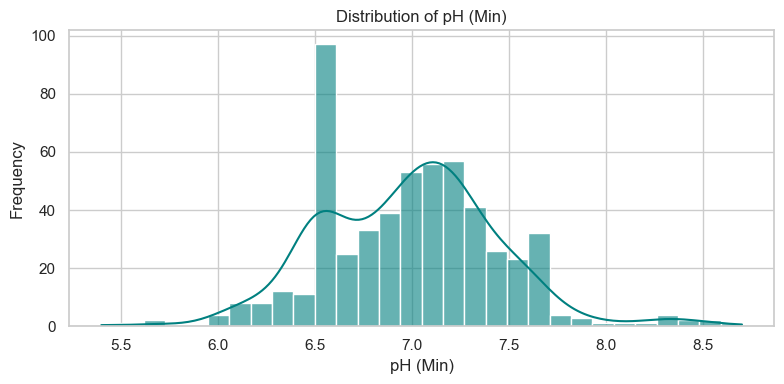

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(df['pH (Min)'], bins=30, kde=True, color='teal', alpha=0.6)
plt.title('Distribution of pH (Min)')
plt.xlabel('pH (Min)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

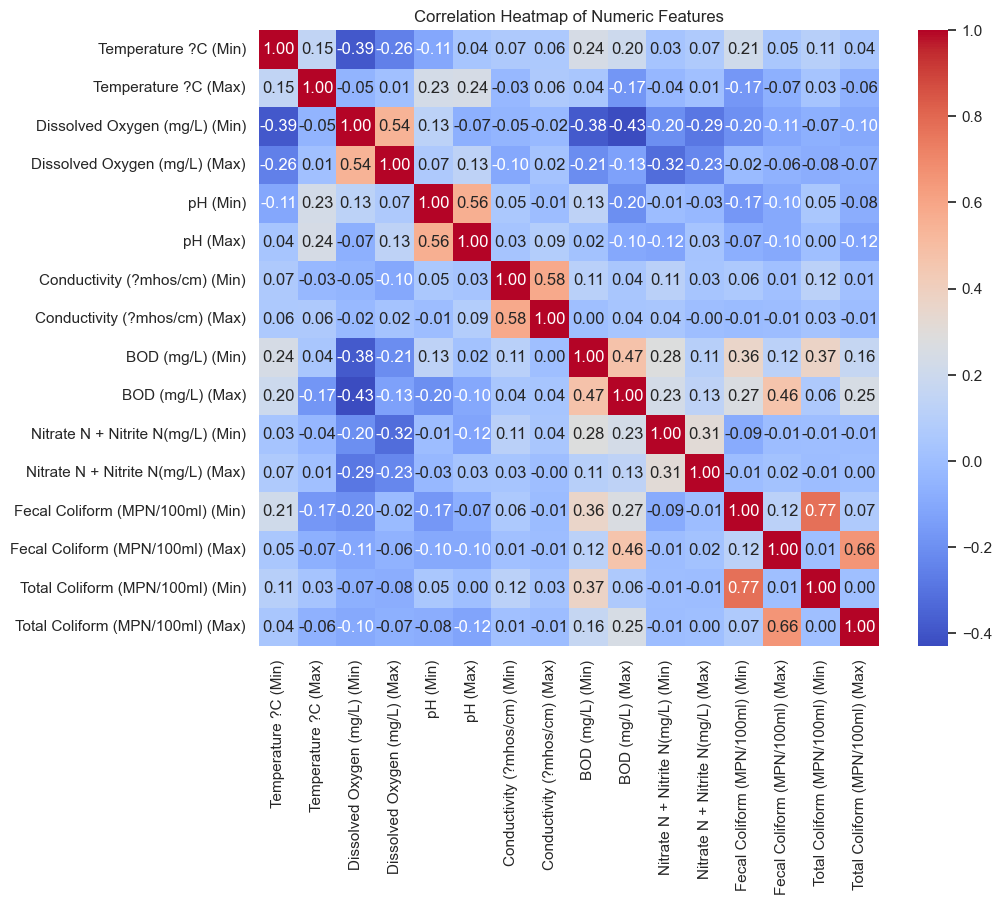

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

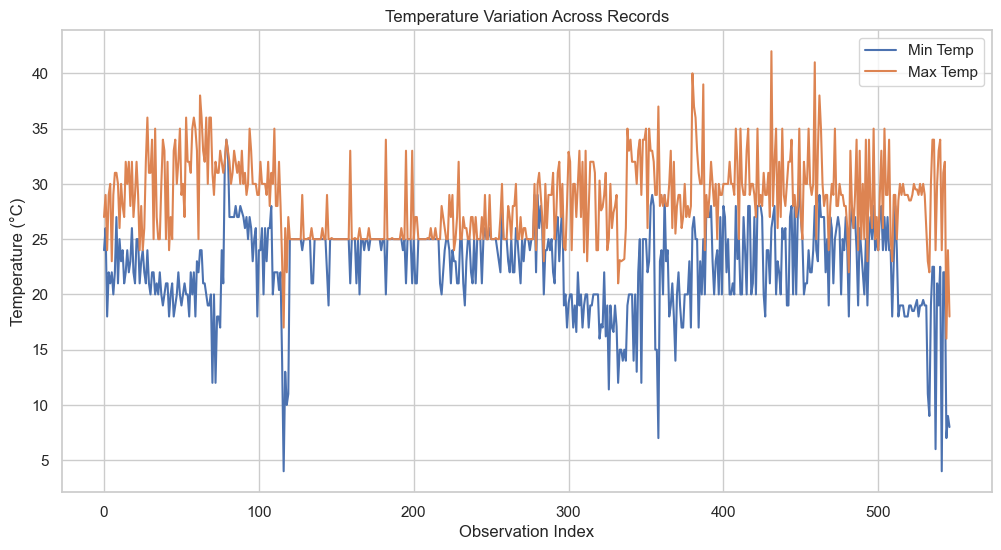

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(x=range(len(df)), y='Temperature ?C (Min)', data=df, label='Min Temp')
sns.lineplot(x=range(len(df)), y='Temperature ?C (Max)', data=df, label='Max Temp')
plt.title('Temperature Variation Across Records')
plt.xlabel('Observation Index')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

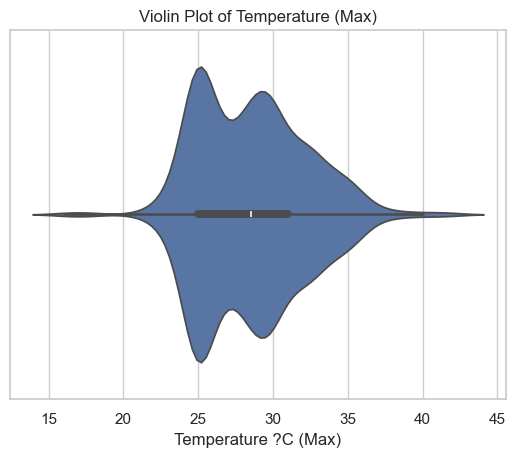

In [28]:
sns.violinplot(x=df['Temperature ?C (Max)'])
plt.title('Violin Plot of Temperature (Max)')
plt.show()

In [29]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='State Name', y='BOD (mg/L) (Max)', data=df)
plt.xticks(rotation=90)
plt.title('BOD (Max) Across States')
plt.ylabel('BOD (mg/L) (Max)')
plt.show()

ValueError: Could not interpret value `State Name` for `x`. An entry with this name does not appear in `data`.

<Figure size 1400x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Temperature ?C (Max)', y='Dissolved Oxygen (mg/L) (Min)', data=df)
plt.title('Dissolved Oxygen vs Temperature')
plt.xlabel('Temperature °C (Max)')
plt.ylabel('Dissolved Oxygen (mg/L) (Min)')
plt.show()

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# List of object columns that should be numeric
object_columns_to_convert = [
    'Dissolved Oxygen (mg/L) (Min)', 'Dissolved Oxygen (mg/L) (Max)',
    'Conductivity (?mhos/cm) (Min)', 'Conductivity (?mhos/cm) (Max)',
    'BOD (mg/L) (Min)', 'BOD (mg/L) (Max)',
    'Nitrate N + Nitrite N(mg/L) (Min)', 'Nitrate N + Nitrite N(mg/L) (Max)',
    'Fecal Coliform (MPN/100ml) (Min)', 'Fecal Coliform (MPN/100ml) (Max)',
    'Total Coliform (MPN/100ml) (Min)'
]

# Convert to numeric, coercing errors
for col in object_columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
df.info()

In [ ]:
df = df.drop(columns=[
    'STN Code', 'Name of Monitoring Location', 'Type Water Body', 'State Name'
])

In [ ]:
# Drop rows with any nulls
df = df.dropna()

In [ ]:
def is_potable(row):
    if (
        not (6.5 <= row['pH (Min)'] <= 8.5) or
        row['BOD (mg/L) (Max)'] > 6 or  # Allowing up to 6 mg/L
        row['Total Coliform (MPN/100ml) (Max)'] > 500 or
        row['Fecal Coliform (MPN/100ml) (Max)'] > 10 or
        row['Dissolved Oxygen (mg/L) (Min)'] < 4  # Less strict
    ):
        return 0
    else:
        return 1


In [ ]:
df['Potability'] = df.apply(is_potable, axis=1)
print(df['Potability'].value_counts())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Split into features and label
X = df.drop('Potability', axis=1)
y = df['Potability']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
